In [23]:
import matplotlib.pyplot as plt
import os 
import sys
import numpy as np
sys.path.append("/home/hujie/code/motivation/src")

In [38]:
type = "cifar10"
root = "/home/hujie/code/motivation/paper/{}_device/data".format(type)
draw_list = ["mi11_cpu","redmi_gpu","mate30e_npu"]
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
barWidth = 0.15

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

mobilenetv2_cifar10_Origin
resnet18_cifar10_Origin
mobilenetv1_cifar10_Origin
[0.995495, 0.8091, 3.75778]
mobilenetv2_cifar10_Origin
resnet18_cifar10_Origin
mobilenetv1_cifar10_Origin
[4.974, 11.127533333, 17.766733333]
mobilenetv2_cifar10_Origin
resnet18_cifar10_Origin
mobilenetv1_cifar10_Origin
[1.92152, 2.24214, 1.65707]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

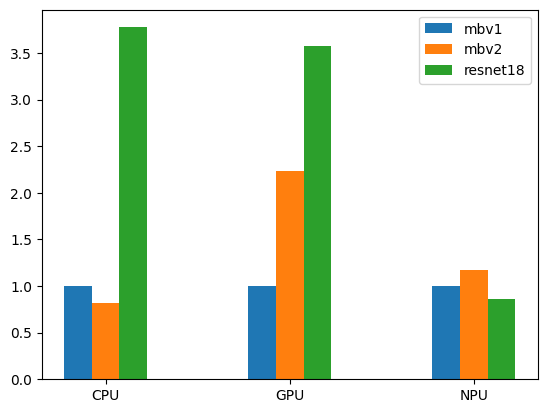

In [39]:
result = []
for device in draw_list:
    txt_path = "{}/{}.txt".format(root,device)
    txt = open(txt_path,"r")
    latency = txt.readlines()
    latency = [i.strip() for i in latency]

    info, data = latency[:3], latency[3:]
    latency_dict = {}
    tmp1 = [0,0,0]
    for i in data:
        tmp = i.split(" ")
        (filepath, filename) = os.path.split(tmp[0])
        (name, suffix) = os.path.splitext(filename)
        print(name)
        if "mobilenetv2" in name:
            tmp1[1] = float(tmp[3])
        elif "mobilenet" in name:
            tmp1[0] = float(tmp[3])
        else:
            tmp1[2] = float(tmp[3])
    print(tmp1)
    result.append(tmp1)
mbv1 = [i[0] for i in result]
mbv2 = [i[1] for i in result]
resnet18 = [i[2] for i in result]
for i in range(len(mbv1)):
    mbv2[i] = mbv2[i]/mbv1[i]
    resnet18[i] = resnet18[i]/mbv1[i]
    mbv1[i] = mbv1[i]/mbv1[i]
r1 = np.arange(len(mbv1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# # 创建柱子
plt.bar(r1, mbv1, width=barWidth, label='mbv1')
plt.bar(r2, mbv2, width=barWidth,  label='mbv2')
plt.bar(r3, resnet18, width=barWidth, label='resnet18')
# # 添加x轴名称
plt.xticks([r + barWidth for r in range(len(mbv1))], ['CPU','GPU','NPU'])

# # 创建图例
plt.legend()
# # 展示图片
plt.savefig("/home/hujie/Desktop/fig/{}_device.png".format(type))
plt.show()
